## Data Understanding

### Numerical data in 16/21 columns

**account length** - the duration of time the client has been active

**area code** - area code of client residence

**number vmail messages** - total vmail messages sent by client

**total day minutes** - total day minutes used by client

**total day calls** - total number of day calls made

**total day charge** - total charge for the day calls

**total eve minutes** - total evening minutes used by client

**total eve calls** - total number of evening calls made

**total eve charge** - total charge for the evening calls

**total night minutes** - total night minutes used by client

**total night calls**- total number of night calls made

**total night charge** - total charge forthe night calls

**total intl minutes** - total international minutes used by the client

**total intl calls**- total number of international calls made

**total intl charge**- total charge for the international calls

**customer service calls** - total number of calls made by client to the customer service

### Categorical data in 5/21 columns

**state** - this is the state where the client resides

**phone number** - the phone contact of the client

**international plan** - for a client who has subscribed to an international plan

**voice mail plan** - for a client who has subscribed to a voicemail plan

**churn** - status of a client as either churned(True) or not churned(False) Syriatel company services

## Data Cleaning and EXploratory Data Analysis

### Importing necessary libraries

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc


### Loading the dataset

In [247]:
# using pandas to read the data
df= pd.read_csv('Data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Cleaning

In [248]:
# checking the rows and columns of our data
df.shape

(3333, 21)

In [249]:
# checking the columns of our data
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [250]:
# checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in this dataset

In [251]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The above dataframe gives the count, mean, std deviation,min and max value, and the 25th, 50th and 75th quartile

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

 phone_number, international_plan and voice_mail_plan are strings and our target churn which is boolean data type but the other features are numeric

#### Dropping irrelevant columns

We will be dropping phone number column since we won't need it

In [253]:
# dropping phone number column
df.drop(['phone number'], axis=1, inplace=True)

## Exploratory Data Analysis

### Exploring Area Code

We will explore the area code to see if it has any relations with customer churn

In [254]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

We have 3 area codes

In [255]:
from scipy.stats import pointbiserialr

# Calculate point-biserial correlation coefficient
correlation, p_value = pointbiserialr(df['area code'], df['churn'])

print("Point-biserial correlation coefficient:", correlation)
print("P-value:", p_value)


Point-biserial correlation coefficient: 0.006174233160678325
P-value: 0.7215998968003063


from the correlation coefficient we see that area code has a positive correlation of 0.7215998968003063 to the churn.

We will then plot a bar graph to show the churn rate of each area below.

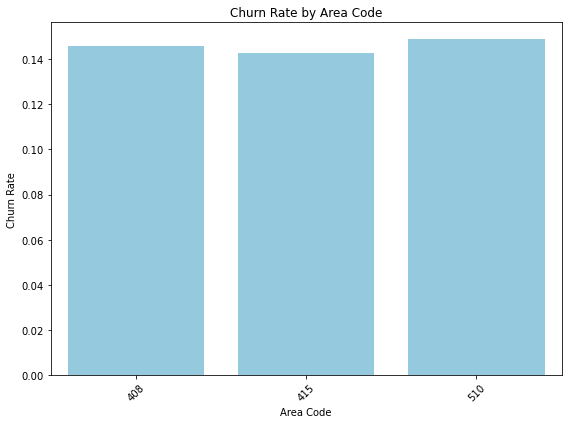

In [256]:
 #Calculate churn rate by area code
churn_rate = df.groupby("area code")["churn"].mean().reset_index()

#Plot churn rate by area code
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_rate, x="area code", y="churn", color="skyblue")
plt.title("Churn Rate by Area Code")
plt.xlabel("Area Code")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the bar plot, we note that as much as the area code correlates with the churn, each area has close to the same rate of churn and has making it a less relevant variable in our data set and hence we will drop it.

In [257]:
df.drop('area code', axis = 1, inplace = True)

### Exploring correlations

We will inspect the columns (total_day_minutes,total_day_calls, total_day_charge	total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes	total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge) to see if there are any correlations between them.

In [258]:
df[['total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']]
df.corr()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


From our correlation matrix we see that there is a  perfect correlation of 1, between all the minutes and charge features and hence we may need to combine these features later.

### Exploring customer churn column

In [259]:
#getting customer churn count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Here we note that there is a class imbalance in our dataset with class: True having 483 values and class: False having 2850 values. We will need to balance this later.

In [260]:
# percentage of customers that churn
churned=df[df['churn']==True].shape[0]
not_churned=df[df['churn']==False].shape[0]
print(churned/(churned+not_churned))

0.14491449144914492


<AxesSubplot:xlabel='churn', ylabel='count'>

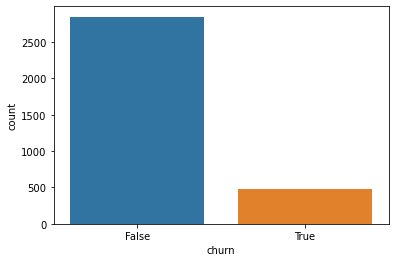

In [261]:
#getting churn visualization
sns.countplot(x='churn', data=df)

### Bar plot of top 15 states with the highest churn rate

We will explore the top states with the highest churn rate from our dataset.

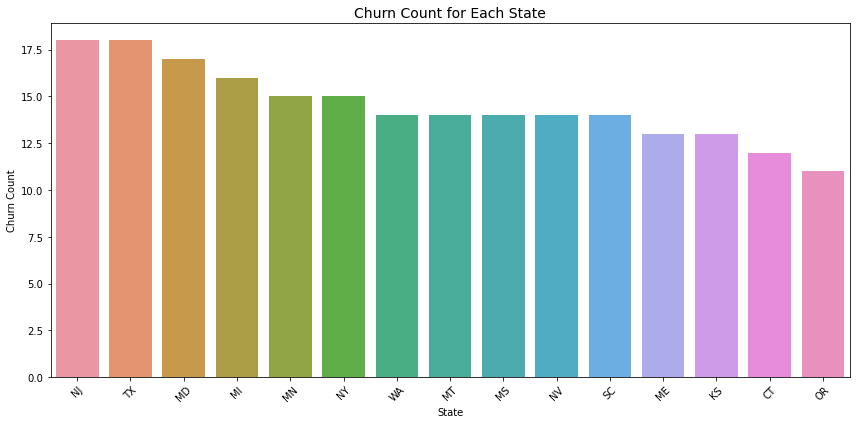

In [262]:
# bar plot of customers who churned
# getting churned df
churned_df = df[df['churn'] == True]

# getting churn counts for each state for churned customers
churn_counts = churned_df['state'].value_counts().sort_values(ascending=False)
top_15=churn_counts.head(15)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot churn  for each state  in descending order
sns.barplot(x=top_15.index, y=top_15.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels 
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.title('Churn Count for Each State', fontsize=14)

# display the plot
plt.tight_layout()  
plt.show()


State New Jersey has the highest churn rate followed by Texas from our visualization above.

### Bar plot of customers who did not churn

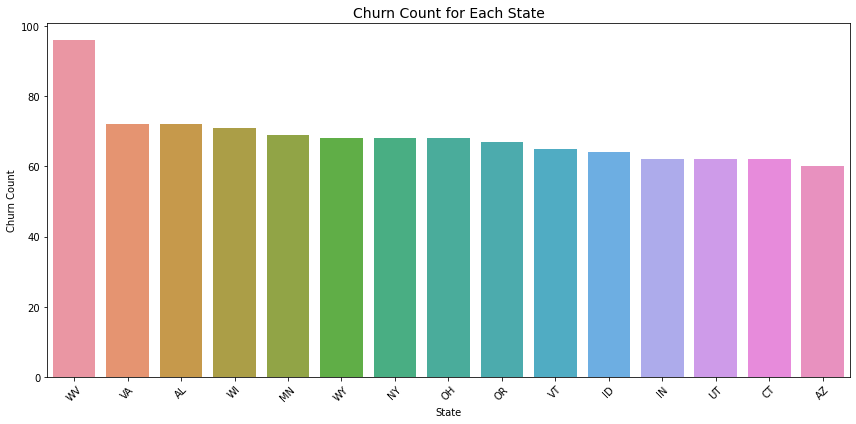

In [263]:
# bar plot of customers who did not churn
# getting customers that were retained df
non_churn_df = df[df['churn'] == False]

# getting non churn counts for each state for non churned customers
non_churn_counts = non_churn_df['state'].value_counts().sort_values(ascending=False)
top_15=non_churn_counts.head(15)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot non churn  for each state  in descending order
sns.barplot(x=top_15.index, y=top_15.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels 
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.title('Churn Count for Each State', fontsize=14)

# display the plot
plt.tight_layout()  
plt.show()

From the plot, the customers we retained the most are from West Virginia followed by Virginia.

## Exploring the customer service calls column

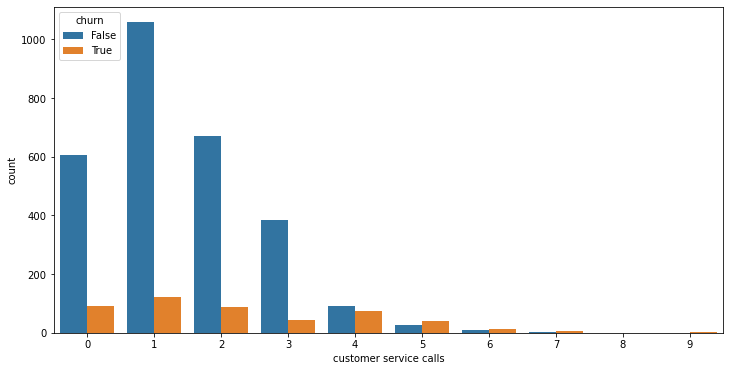

In [264]:
# Set the figure size
plt.figure(figsize=(12, 6))
sns.countplot(x='customer service calls', hue='churn', data=df)
#display
plt.show()

From the plot we see that the retained customers have higher calls but the churned ones equally contant customer service.

### Exploring the voice mail churn column

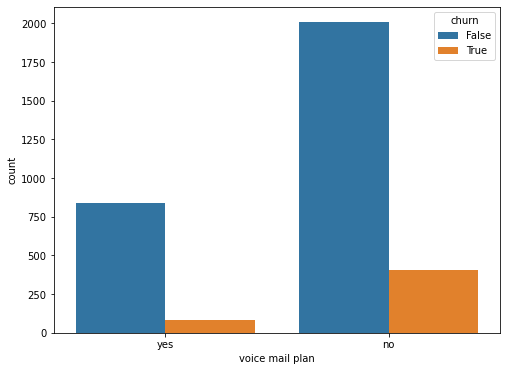

In [265]:
# Set the figure size
plt.figure(figsize=(8, 6))
sns.countplot(x='voice mail plan', hue='churn', data=df)
# display
plt.show()

Most of the churned customers did not have a voice mail plan.

### Exploring international plan column

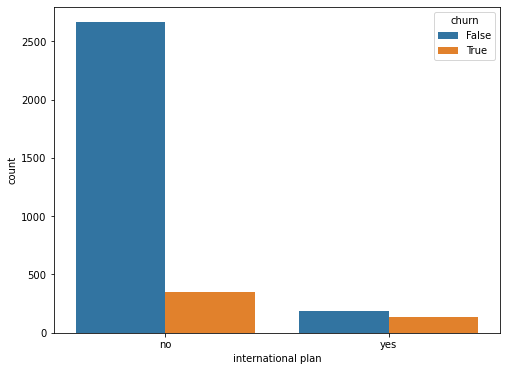

In [266]:
# Set the figure size
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df)
# display
plt.show()

Most of the churned customers do not have an international plan.

## Distribution of total day charge

<Figure size 1080x576 with 0 Axes>

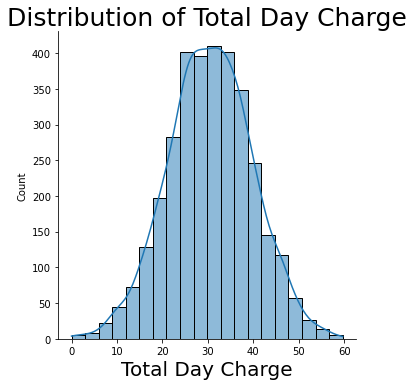

In [267]:
# plotting displot
plt.figure(figsize=(15,8))
sns.displot(df['total day charge'], bins=20, kde=True)
#setting labels
plt.title('Distribution of Total Day Charge', fontsize = 25)
plt.xlabel('Total Day Charge', fontsize = 20)
plt.show()

From the distribution the data is normally distributed.

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

## Encoding categorical data

We will first split our data into train and test splits before encoding it to prevent data leakage.

In [269]:
#Prepare the data
X = df.drop('churn', axis=1)
y = df['churn']

### Binary encoding 

In [270]:
# Split the data into training and testing sets
# we will use a test size of 0.2 and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will do binary encoding using LabelEncoder from sklearn. And we will fit and transform categorical variables in training data and transform the same categorical variables in test data.

In [271]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
#label encoding categorical variables to binary
# instantiate the label encoder
label_encoder = LabelEncoder()
# perform encoding
X_train['international plan'] = label_encoder.fit_transform(X_train['international plan'])
X_train['voice mail plan'] = label_encoder.fit_transform(X_train['voice mail plan'])
X_train['international plan'] = X_train['international plan'].astype('int64')
X_train['voice mail plan'] = X_train['voice mail plan'].astype('int64')

# Apply the transformation to the testing data
X_test['international plan'] = label_encoder.transform(X_test['international plan'])
X_test['voice mail plan'] = label_encoder.transform(X_test['voice mail plan'])

### One Hot Encoding

### One hot encoding train data

We will perform one hot encoding on the state column to make it numerical. We will fit and transform the train set then transform the column as well in test set.

In [272]:
# instantiate ohe object
ohe = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

# fit ohe on small train data
ohe.fit(X_train[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)

# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)

### One hot encoding test data

In [273]:
# df with encoded states
test_state_encoded = pd.DataFrame(ohe.transform(X_test[['state']]), 
                               index = X_test.index, 
                               columns = col_names)

# combine encoded states with X_test and drop old 'state' column
X_test = pd.concat([X_test.drop("state", axis = 1), test_state_encoded], axis = 1)

In [274]:
# checking first five rows of our data
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
817,243,0,0,0,95.5,92,16.24,163.7,63,13.91,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,108,0,0,0,112.0,105,19.04,193.7,110,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,75,1,0,0,222.4,78,37.81,327.0,111,27.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,141,0,0,0,126.9,98,21.57,180.0,62,15.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,86,0,0,0,216.3,96,36.77,266.3,77,22.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2666 non-null   int64  
 1   international plan      2666 non-null   int64  
 2   voice mail plan         2666 non-null   int64  
 3   number vmail messages   2666 non-null   int64  
 4   total day minutes       2666 non-null   float64
 5   total day calls         2666 non-null   int64  
 6   total day charge        2666 non-null   float64
 7   total eve minutes       2666 non-null   float64
 8   total eve calls         2666 non-null   int64  
 9   total eve charge        2666 non-null   float64
 10  total night minutes     2666 non-null   float64
 11  total night calls       2666 non-null   int64  
 12  total night charge      2666 non-null   float64
 13  total intl minutes      2666 non-null   float64
 14  total intl calls        2666 non-null 

## Feature Engineering

### Getting new features

We will come up with columns with the features, for total call duration, average charge per local and international calls, total charges and tenure years.

### On Train data

In [276]:
# Create new feature for total call duration 
X_train['total_call_duration'] = X_train['total day minutes'] + X_train['total eve minutes'] + X_train['total night minutes'] + X_train['total intl minutes']
#getting average call charges for international 
# Calculate average charge per call for international calls
X_train['average_charge_per_intl_call'] = X_train['total intl charge'] / X_train['total intl calls']
#getting average call charges for local
# Calculate average charge per call for local calls
local_call_charges= ['total day charge', 'total eve charge', 'total night charge']
total_local_call_charges= X_train[local_call_charges].sum(axis=1)
total_local_calls = X_train[['total day calls', 'total eve calls', 'total night calls']].sum(axis=1)
X_train['average_charge_per_local_call'] = total_local_call_charges / total_local_calls

# Calculate total charges
X_train['total_charges'] = (X_train['total day charge'] + X_train['total eve charge'] +
                       X_train['total night charge'] + X_train['total intl charge'])

# Convert account length to tenure in years
X_train['tenure_years'] = X_train['account length'] / 12



 ### On Test Data

In [277]:
# Create new feature for total call duration 
X_test['total_call_duration'] = X_test['total day minutes'] + X_test['total eve minutes'] + X_test['total night minutes'] + X_test['total intl minutes']
#getting average call charges for international 
# Calculate average charge per call for international calls
X_test['average_charge_per_intl_call'] = X_test['total intl charge'] / df['total intl calls']
#getting average call charges for local
# Calculate average charge per call for local calls
local_call_charges= ['total day charge', 'total eve charge', 'total night charge']
total_local_call_charges= X_test[local_call_charges].sum(axis=1)
total_local_calls = X_test[['total day calls', 'total eve calls', 'total night calls']].sum(axis=1)
X_test['average_charge_per_local_call'] = total_local_call_charges / total_local_calls

# Calculate total charges
X_test['total_charges'] = (X_test['total day charge'] + X_test['total eve charge'] +
                       X_test['total night charge'] + X_test['total intl charge'])

# Convert account length to tenure in years
X_test['tenure_years'] = X_test['account length'] / 12



In [278]:
# checking missing data
X_train.isnull().sum()

account length                    0
international plan                0
voice mail plan                   0
number vmail messages             0
total day minutes                 0
                                 ..
total_call_duration               0
average_charge_per_intl_call     14
average_charge_per_local_call     0
total_charges                     0
tenure_years                      0
Length: 73, dtype: int64

After feature engineering, we notice that there is a column with some missing data, the 'average_charge_per_intl_call' column. We will therefore replace it with the median since it is less sensitive to outliers. 

### Removing missind data

### On train data

In [279]:
# initialize imputer
imputer = SimpleImputer(strategy='median')

# Selecting the column to impute
column = ['average_charge_per_intl_call']

# Fit the imputer 
imputer.fit(X_train[column])

# Transform the column by replacing missing values with the median
X_train [column] = imputer.transform(X_train[column])

### On test data

In [280]:
# initialize imputer
imputer = SimpleImputer(strategy='median')

# Selecting the column to impute
column = ['average_charge_per_intl_call']

# Fit the imputer 
imputer.fit(X_test[column])

# Transform the column by replacing missing values with the median
X_test [column] = imputer.transform(X_test[column])

In [281]:
# ensuring null values have been replaced
X_train.isnull().sum()

account length                   0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
                                ..
total_call_duration              0
average_charge_per_intl_call     0
average_charge_per_local_call    0
total_charges                    0
tenure_years                     0
Length: 73, dtype: int64

The missing data have been removed

## Model Iterations

## Random Forest Model before Any Tuning

We will run Random Forest classifier with all features and default parameters to see how it performs before tuning it.

In [282]:
def create_models(seed=42):
    models =[]
    #models.append(('logistic regression', LogisticRegression(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    return models
models= create_models()


In [327]:
# results using default parameters
results= []
names=[]
scoring = 'accuracy'
for name, model in models:
    # fit model with training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with testing data
    predictions=model.predict(X_test)
    # calculating accuracy
    accuracy=accuracy_score(y_test, predictions)
    # append model name and accuracy to the lists
    results.append(accuracy)
    names.append(name)
    #print classifier accuracy
    print('classifier:{}, Accuracy: {})'.format(name, accuracy))
    print(classification_report(y_test, predictions))
# Calculate predicted probabilities for positive class
y_proba = model.predict_proba(X_test)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

classifier:random_forest, Accuracy: 0.9610194902548725)
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       566
        True       1.00      0.74      0.85       101

    accuracy                           0.96       667
   macro avg       0.98      0.87      0.91       667
weighted avg       0.96      0.96      0.96       667



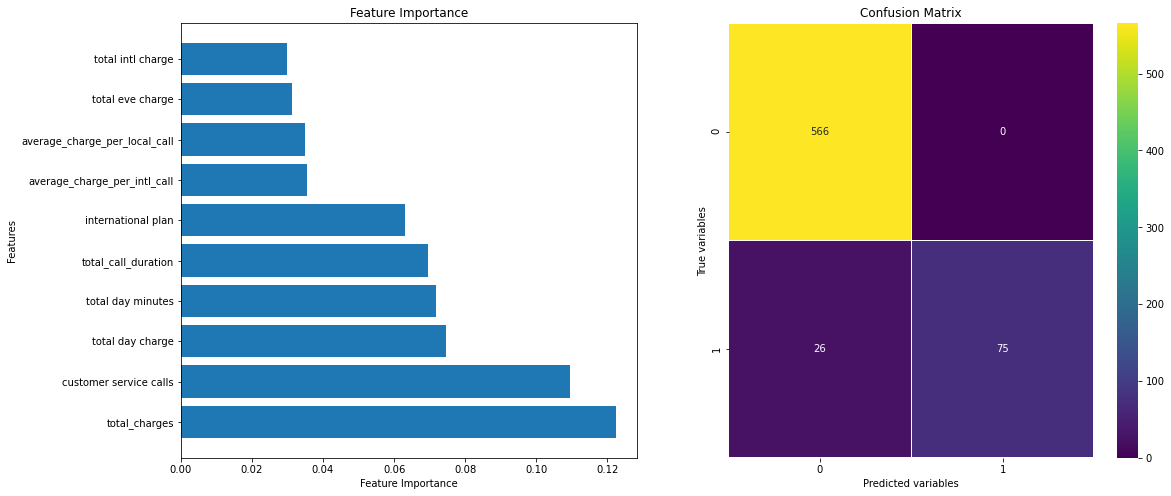

In [328]:
feature_importance = model.feature_importances_
# Zip feature names and their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort feature importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
for feature, importance in sorted_feature_importance:
    features = [x[0] for x in sorted_feature_importance[:10]]
    importance = [x[1] for x in sorted_feature_importance[:10]]

# Plot horizontal bar graph
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# visualizing model performance using confusion matrix
plt.subplot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, predictions)
#plotting heatmap
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=.5)
# setting the labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted variables")
plt.ylabel("True variables")
# displaying the data
plt.show()

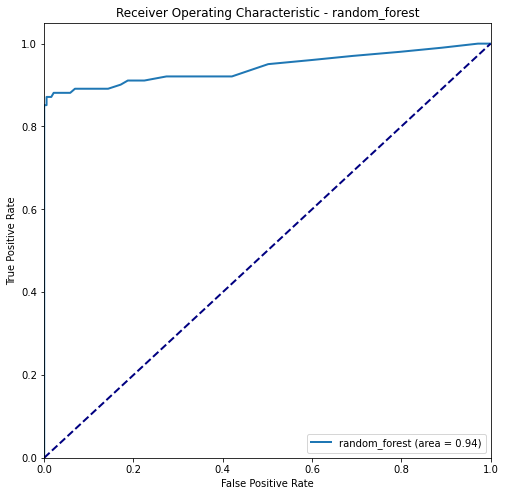

In [332]:
    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()

### Dealing with class imbalance

In [31]:
# getting the class imbalance 
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Balancing the imbalanced class

In [343]:
# balancing the classes using SMOTE
# instantiating SMOTE
smote = SMOTE(random_state=42)
# fitting SMOTE on our data set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [344]:
# seeing if class imbalance has been solved
pd.Series(y_train_resampled).value_counts()

True     2284
False    2284
Name: churn, dtype: int64

## Random Forest Model after Parameter Tuning

We are going to run our model now, after tuning it to see if the performance improves after model tuning. We will use random search to find the best parameters for the model.

In [351]:
# Define a function to perform random search and evaluate the model
def perform_grid_search(classifier, param_grid):
    # Define the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    
    # Perform GridSearchCV
    random_search = GridSearchCV(estimator = pipe,
                       param_grid=grid,
                       scoring = 'accuracy',
                       cv=5)
    random_search.fit(X_train_resampled, y_train_resampled)

    # Get the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)

    # Evaluate the model on the test set
    y_pred = random_search.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("Test Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    
    return  best_params, accuracy


In [352]:
classifier= RandomForestClassifier()
param_grid = [{'classifier__max_depth': [None, 2,6,10],
        'classifier__min_samples_split': [5,10]}] 
perform_grid_search(classifier, param_grid)

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5}
Test Accuracy: 0.9610194902548725
Precision: 0.9746835443037974
Recall: 0.7623762376237624
F1 Score: 0.8555555555555555
Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       566
        True       0.97      0.76      0.86       101

    accuracy                           0.96       667
   macro avg       0.97      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667



({'classifier__max_depth': None, 'classifier__min_samples_split': 5},
 0.9610194902548725)

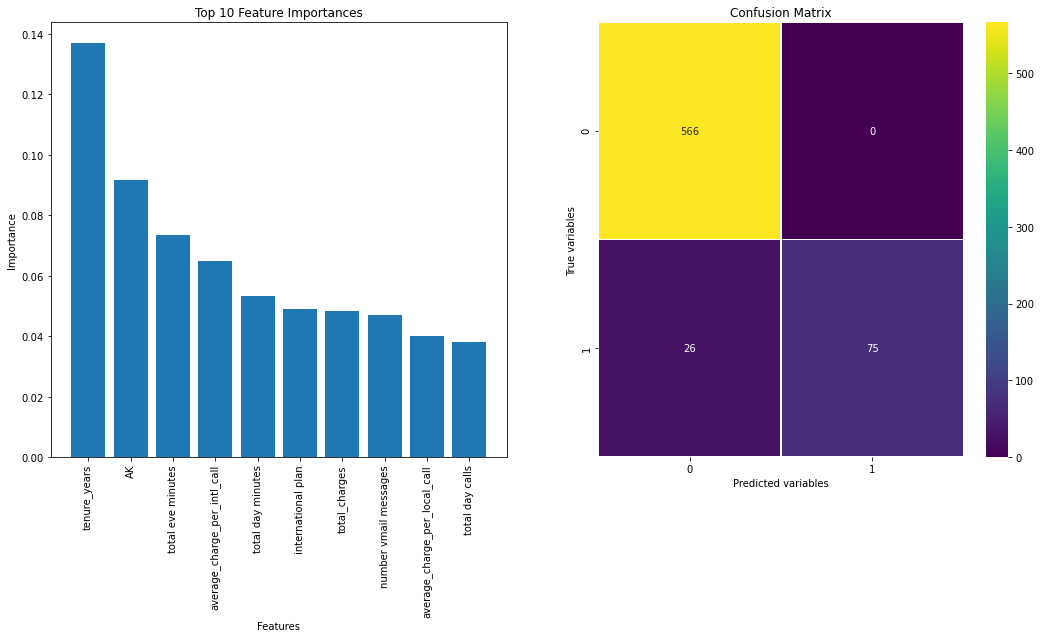

In [359]:
# Plot horizontal bar graph
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
n_of_features = 10  
feature_importances = random_search.best_estimator_['classifier'].feature_importances_
# Get indices of top 10 features
indices = np.argsort(feature_importances)[::-1][:n_of_features]
# getting labels
plt.title("Top 10 Feature Importances")
plt.bar(range(n_of_features), feature_importances[indices], align="center", )
plt.xticks(range(n_of_features), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")

# visualizing model performance using confusion matrix
plt.subplot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, predictions)
#plotting heatmap
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=.5)
# setting the labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted variables")
plt.ylabel("True variables")
# displaying the data
plt.show()